In [22]:
import numpy as np
import pandas as pd


quemadura_data = pd.read_csv("arbQuemadura.csv",index_col=0)
quemadura_data.head()

,Pelo,Altura,Peso,Proteccion,Quemadura
Ejemplo,,,,,
1,rubio,medio,bajo,no,si
2,rubio,alto,medio,si,no
3,moreno,bajo,medio,si,no
4,rubio,bajo,medio,no,si
5,rojo,medio,alto,no,si


In [23]:
import pandas as pd
from sklearn import tree
from sklearn import preprocessing

data = pd.DataFrame()

le = preprocessing.LabelEncoder()

var = ["Pelo", "Altura","Peso","Proteccion", "Quemadura"]

for v in var:
  le.fit(quemadura_data[v])
  data[v] = le.transform(quemadura_data[v])

#construir el arbol
clf = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth=4)

t_data = data[data.columns[0:4]]
t_respuesta = data[data.columns[4]]

#crear el modelo
clf = clf.fit(t_data, t_respuesta)

t_data,t_respuesta,clf

(   Pelo  Altura  Peso  Proteccion
 0     2       2     1           0
 1     2       0     2           1
 2     0       1     2           1
 3     2       1     2           0
 4     1       2     0           0
 5     0       0     0           0
 6     0       2     0           0
 7     2       1     1           1,
 0    1
 1    0
 2    0
 3    1
 4    1
 5    0
 6    0
 7    0
 Name: Quemadura, dtype: int32,
 DecisionTreeClassifier(criterion='entropy', max_depth=4))

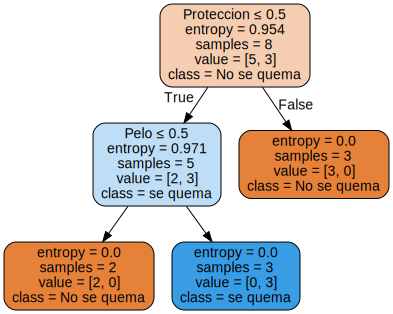

In [24]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file = None,
                                feature_names = list(t_data.columns.values),
                                class_names = ["No se quema","se quema"],
                                filled = True, rounded = True, special_characters = True)
                              
graph = graphviz.Source(dot_data)
graph

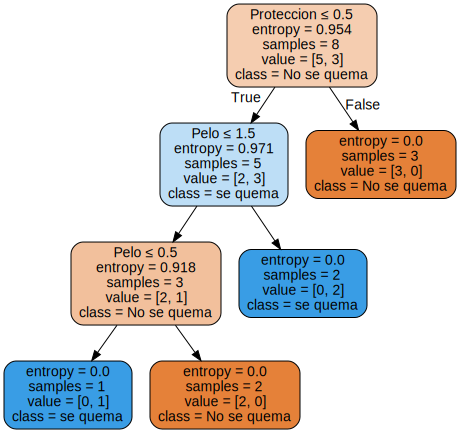

In [25]:
import pandas as pd
import numpy as np
from sklearn import tree
#from sklearn import preprocessing

data = quemadura_data.copy()

data["Pelo"] = np.where(data["Pelo"] == "rubio",2,
                        np.where(data["Pelo"] == "moreno",1,0))

data["Altura"] = np.where(data["Altura"] == "medio",2,
                        np.where(data["Altura"] == "alto",1,0))

data["Peso"] = np.where(data["Peso"] == "bajo",2,
                        np.where(data["Peso"] == "medio",1,0))
data["Proteccion"] = np.where(data["Proteccion"] == "si",1,0)

#construir el arbol
clf = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth=4)

t_data = data[data.columns[0:4]]
t_respuesta = data[data.columns[4]]

#crear el modelo
clf = clf.fit(t_data, t_respuesta)

import graphviz
dot_data = tree.export_graphviz(clf, out_file = None,
                                feature_names = list(t_data.columns.values),
                                class_names = ["No se quema","se quema"],
                                filled = True, rounded = True, special_characters = True)
                              
graph = graphviz.Source(dot_data)
graph

In [26]:
import pandas as pd
from sklearn import tree
from sklearn import preprocessing

quemadura_test = pd.read_csv("arbQuemaduraTest.csv", index_col=0)


data = pd.DataFrame()
data_test = pd.DataFrame()

le = preprocessing.LabelEncoder()

var = ["Pelo", "Altura","Peso","Proteccion", "Quemadura"]

for v in var:
  le.fit(quemadura_data[v])
  data[v] = le.transform(quemadura_data[v])
  data_test[v] = le.transform(quemadura_test[v])

#construir el arbol
clf = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth=4)

t_data = data[data.columns[0:4]]
t_respuesta = data[data.columns[4]]
x_test = data_test[data_test.columns[0:4]]


#crear el modelo
clf = clf.fit(t_data, t_respuesta)
y_respuesta = clf.predict(x_test)
t_data, t_respuesta, y_respuesta

(   Pelo  Altura  Peso  Proteccion
 0     2       2     1           0
 1     2       0     2           1
 2     0       1     2           1
 3     2       1     2           0
 4     1       2     0           0
 5     0       0     0           0
 6     0       2     0           0
 7     2       1     1           1,
 0    1
 1    0
 2    0
 3    1
 4    1
 5    0
 6    0
 7    0
 Name: Quemadura, dtype: int32,
 array([0]))

In [27]:
#calcular la entropia
def calcular_entropia(p):
  return -np.sum(p*np.log2(p))

#contar las clases de la caracteristica
valores, cuantos = np.unique(quemadura_data['Quemadura'], return_counts=True)
entropia = calcular_entropia(cuantos/sum(cuantos))
print("Entropia del arbol",entropia)
valores,cuantos

Entropia del arbol 0.954434002924965


(array(['no', 'si'], dtype=object), array([5, 3], dtype=int64))

In [28]:
#calcular la ganancia
def calcular_ganancia(valores, var = 'Pelo'):

  valores, cuantos = np.unique(quemadura_data[var], return_counts=True)

  info_a = []

  for e in valores:
    se = np.where(quemadura_data[var]==e)
    print("subconjunto",se)

    se_quemadura = quemadura_data['Quemadura'][quemadura_data.index[se[0]]]
    print("Ejemplos del valor", se_quemadura)

    v_se_quemadura, c_se_quemadura = np.unique(se_quemadura,return_counts=True)
    print("subgrupos",v_se_quemadura,c_se_quemadura)

    #entropia del valor
    se_entropia = abs(calcular_entropia(c_se_quemadura/sum(c_se_quemadura)))
    print("entropia del valor",se_entropia)

    #probabilidad del valor
    se_size = sum(c_se_quemadura)/len(quemadura_data.index)
    print("probabilidad",se_size)

    info_a += [[se_entropia, se_size]]
    print("info_a",info_a)

  info_a = np.array(info_a)

  #calcular la entropia de la variable
  info_g = np.sum(info_a[:,0]*info_a[:,1])
  print("entropia de la variable",info_g)
  return info_g

info_a = calcular_ganancia(valores, var = 'Pelo')
ganancia = entropia -info_a
print("ganancia de pelo", ganancia)








subconjunto (array([2, 5, 6], dtype=int64),)
Ejemplos del valor Ejemplo
3    no
6    no
7    no
Name: Quemadura, dtype: object
subgrupos ['no'] [3]
entropia del valor 0.0
probabilidad 0.375
info_a [[0.0, 0.375]]
subconjunto (array([4], dtype=int64),)
Ejemplos del valor Ejemplo
5    si
Name: Quemadura, dtype: object
subgrupos ['si'] [1]
entropia del valor 0.0
probabilidad 0.125
info_a [[0.0, 0.375], [0.0, 0.125]]
subconjunto (array([0, 1, 3, 7], dtype=int64),)
Ejemplos del valor Ejemplo
1    si
2    no
4    si
8    no
Name: Quemadura, dtype: object
subgrupos ['no' 'si'] [2 2]
entropia del valor 1.0
probabilidad 0.5
info_a [[0.0, 0.375], [0.0, 0.125], [1.0, 0.5]]
entropia de la variable 0.5
ganancia de pelo 0.45443400292496505


In [29]:
info_a = calcular_ganancia(valores, var = 'Altura')
ganancia = entropia -info_a
print("ganancia de altura", ganancia)

subconjunto (array([1, 5], dtype=int64),)
Ejemplos del valor Ejemplo
2    no
6    no
Name: Quemadura, dtype: object
subgrupos ['no'] [2]
entropia del valor 0.0
probabilidad 0.25
info_a [[0.0, 0.25]]
subconjunto (array([2, 3, 7], dtype=int64),)
Ejemplos del valor Ejemplo
3    no
4    si
8    no
Name: Quemadura, dtype: object
subgrupos ['no' 'si'] [2 1]
entropia del valor 0.9182958340544896
probabilidad 0.375
info_a [[0.0, 0.25], [0.9182958340544896, 0.375]]
subconjunto (array([0, 4, 6], dtype=int64),)
Ejemplos del valor Ejemplo
1    si
5    si
7    no
Name: Quemadura, dtype: object
subgrupos ['no' 'si'] [1 2]
entropia del valor 0.9182958340544896
probabilidad 0.375
info_a [[0.0, 0.25], [0.9182958340544896, 0.375], [0.9182958340544896, 0.375]]
entropia de la variable 0.6887218755408672
ganancia de altura 0.2657121273840979


In [30]:
info_a = calcular_ganancia(valores, var = 'Peso')
ganancia = entropia -info_a
print("ganancia de peso", ganancia)

subconjunto (array([4, 5, 6], dtype=int64),)
Ejemplos del valor Ejemplo
5    si
6    no
7    no
Name: Quemadura, dtype: object
subgrupos ['no' 'si'] [2 1]
entropia del valor 0.9182958340544896
probabilidad 0.375
info_a [[0.9182958340544896, 0.375]]
subconjunto (array([0, 7], dtype=int64),)
Ejemplos del valor Ejemplo
1    si
8    no
Name: Quemadura, dtype: object
subgrupos ['no' 'si'] [1 1]
entropia del valor 1.0
probabilidad 0.25
info_a [[0.9182958340544896, 0.375], [1.0, 0.25]]
subconjunto (array([1, 2, 3], dtype=int64),)
Ejemplos del valor Ejemplo
2    no
3    no
4    si
Name: Quemadura, dtype: object
subgrupos ['no' 'si'] [2 1]
entropia del valor 0.9182958340544896
probabilidad 0.375
info_a [[0.9182958340544896, 0.375], [1.0, 0.25], [0.9182958340544896, 0.375]]
entropia de la variable 0.9387218755408671
ganancia de peso 0.015712127384097996


In [31]:
info_a = calcular_ganancia(valores, var = 'Proteccion')
ganancia = entropia -info_a
print("ganancia de proteccion", ganancia)

subconjunto (array([0, 3, 4, 5, 6], dtype=int64),)
Ejemplos del valor Ejemplo
1    si
4    si
5    si
6    no
7    no
Name: Quemadura, dtype: object
subgrupos ['no' 'si'] [2 3]
entropia del valor 0.9709505944546686
probabilidad 0.625
info_a [[0.9709505944546686, 0.625]]
subconjunto (array([1, 2, 7], dtype=int64),)
Ejemplos del valor Ejemplo
2    no
3    no
8    no
Name: Quemadura, dtype: object
subgrupos ['no'] [3]
entropia del valor 0.0
probabilidad 0.375
info_a [[0.9709505944546686, 0.625], [0.0, 0.375]]
entropia de la variable 0.6068441215341679
ganancia de proteccion 0.34758988139079716


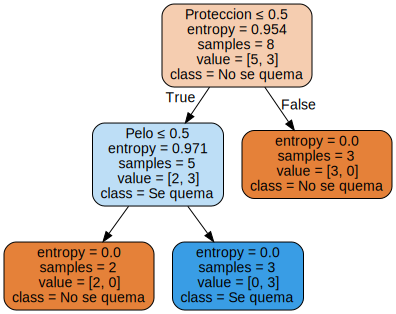

In [32]:
from sklearn import tree
from sklearn import preprocessing

data = pd.DataFrame()

#Transformar a valores numeicos
le = preprocessing.LabelEncoder()

var = ["Pelo", "Altura", "Peso", "Proteccion", "Quemadura"]

for v in var:
    le.fit(quemadura_data[v])
    data[v] = le.transform(quemadura_data[v])

# Build tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

t_data = data[data.columns[0:4]]
t_target = data[data.columns[4]]

# Fit model to data
clf = clf.fit(t_data, t_target)
t_data,t_target,clf

# Visualize tree
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=list(t_data.columns.values),  
                         class_names=["No se quema", "Se quema"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

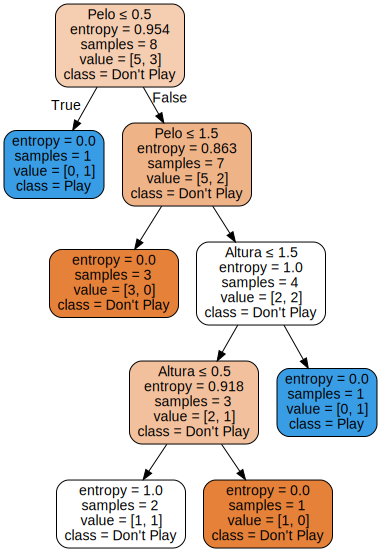

In [33]:
data = quemadura_data.copy()

data["Pelo"] = np.where(data["Pelo"]=="rubio", 2, 
                          np.where(data["Pelo"]=="moreno", 1, 0))

data["Altura"] = np.where(data["Altura"]=="medio", 2, 
                               np.where(data["Altura"]=="alto", 1, 0))

data["Peso"] = np.where(data["Peso"]=="bajo", 2,
                        np.where(data["Peso"]=="medio",1,0))

data["Proteccion"] = np.where(data["Proteccion"]=="no", 0, 1)
    
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

t_data = data[data.columns[0:4]]
t_target = data[data.columns[4]]

clf = clf.fit(t_data, t_target)

import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=list(t_data.columns.values),  
                         class_names=["Don't Play", "Play"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [34]:
from sklearn import tree
from sklearn import preprocessing

data = pd.DataFrame()

#Transformar a valores numeicos
le = preprocessing.LabelEncoder()

var = ["Pelo", "Altura", "Peso", "Proteccion", "Quemadura"]

for v in var:
    le.fit(quemadura_data[v])
    data[v] = le.transform(quemadura_data[v])

# Build tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

t_data = data[data.columns[0:4]]
t_target = data[data.columns[4]]

# Fit model to data
clf = clf.fit(t_data, t_target)
t_data,t_target,clf

(   Pelo  Altura  Peso  Proteccion
 0     2       2     1           0
 1     2       0     2           1
 2     0       1     2           1
 3     2       1     2           0
 4     1       2     0           0
 5     0       0     0           0
 6     0       2     0           0
 7     2       1     1           1,
 0    1
 1    0
 2    0
 3    1
 4    1
 5    0
 6    0
 7    0
 Name: Quemadura, dtype: int32,
 DecisionTreeClassifier(criterion='entropy', max_depth=4))

In [35]:
from sklearn import tree
from sklearn import preprocessing

quemadura_test = pd.read_csv("arbQuemaduraTest.csv",index_col=0)
data = pd.DataFrame()
data1 = pd.DataFrame()
#Transformar a valores numeicos
le = preprocessing.LabelEncoder()

var = ["Pelo", "Altura", "Peso", "Proteccion", "Quemadura"]
for v in var:
    le.fit(quemadura_data[v])
    data[v] = le.transform(quemadura_data[v])
    data1[v] = le.transform(quemadura_test[v])

# Build tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

t_data = data[data.columns[0:4]]
t_target = data[data.columns[4]]

# Fit model to data
clf = clf.fit(t_data, t_target)
X_test = data1[data1.columns[0:4]]
y_pred = clf.predict(X_test)
y_pred


array([0])